<h1 align="center">Machine Learning and Artificial Intelligence</h1>
<h2 align="center">Stefano Brilli s249914 - Homework 2</h2>

## 1 Analysis definition
In this homework we will use a tool for classification, called <b>Support Vector Machine</b>, in order to classify flowers according to their features. The dataset is presented in one of the next chapters.

### 1.1 Definition of hyperplane
In a p-dimensional space, a hyperplane is a flat affine subspace of dimension p-1 (the word affine indicates that the subspace need not pass through the origin).
In three dimensions, a hyperplane is a flat two-dimensional subspace, that is a plane.
In two dimensions it's a line. The mathematical definition of a hyperplane is quite simple. In two dimensione, a hyperplane is defined by the equation {{r'\beta_{0}+\beta_{1}X_{1}-X_{2}=0'}}

In [2]:
Math(r'\beta_{0}+\beta_{1}X_{1}-X_{2}=0')

<IPython.core.display.Math object>

### 1.2 SVM briefly explanation
SVM is a supervised algorithm used for classifying data belonging to two or more classes. The objective is to find the hyperplane that separates well data.
It means that for each point we want to assign it a label according to the side it belongs to. 

#### 1.2.1 Large Margin Separation
If our data can be perfectly separated using a hyperplane, then there exists an infinte number of such hyperplanes.
We have to decide which of these hyperplanes we want to use to separate data.
A natural choice is the <i>large margin separation</i> (also called <i>maximal margin separation</i>), which is the separating hyperplane so that the distance between two point groups is as large as possible.

#### 1.2.2 Soft Margin Separation
In order to get a greater robustness to individual observations and obtain a better classification of most of the training observations, we can fit the model by using a soft margin classifier.
The idea here is: rather than seeking the largest possible margin so that every observation is not only on the correct side of the hyperplane but also on the correct side of the margin, we instead allow some observations to be on the incorrect side of the margin, or even the incorrect side of the hyperplane. The margin is called soft because it can be violated by some of the training observations.

### 1.3 The dataset
Our analysis will be performed on the <i>iris</i> data, available at https://archive.ics.uci.edu/ml/datasets/iris or by importing the data sets library of sklearn.
The data set contains 150 observations belonging to 3 classes, where each class is referred to a type of iris plant.
For simplicity we will use just two features of the dataset: <i>sepal length in cm</i> and <i>sepal width in cm</i>.
<table style="border: 1px solid black;">
    <tr>
        <th style="border: 1px solid black">Class 1</th>
        <th style="border: 1px solid black;">Class 2</th>
        <th style="border: 1px solid black;">Class 3</th>
        <th style="border: 1px solid black;">Feature 1</th>
        <th style="border: 1px solid black;">Feature 2</th>
    </tr>
    <tr>
        <td style="border: 1px solid black;">Iris-setosa</th>
        <td style="border: 1px solid black;">Iris-versicolor</th>
        <td style="border: 1px solid black;">Iris-virginica</th>
        <td style="border: 1px solid black;">sepal length in cm </th>
        <td style="border: 1px solid black;">sepal width in cm </th>
    </tr>
    <tr>
        <td style="border: 1px solid black;">[0]</th>
        <td style="border: 1px solid black;">[1]</th>
        <td style="border: 1px solid black;">[2]</th>
    </tr>
</table>

### 1.4 Linear and non-linear SVM
According to the <i>Convergence Theorem</i> it's always possible to find a hyperplane that separates data that are linearly separable (http://www.cems.uvm.edu/~rsnapp/teaching/cs295ml/notes/perceptron.pdf).
Many times this condition isn't satisfied, so it's necessary to find another separation. In this homework I will use both linear and non-linear kernel to find a hyperplane. I will use the following kernels for classifying data:<br>
    • <b>Linear kernel</b>: I've to find the best C hyperparameter<br>
    • <b>RBF</b>: I've to find C and λ hyperparameters.

### 1.5 Used tools
As for the previous homework, we will use the Python language and sklearn libraries to complete the analysis  (http://scikit-learn.org/stable/documentation.html) and matplotlib for plotting data (https://matplotlib.org/)

In [11]:
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets, svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from tabulate import tabulate
from IPython.display import Math
from IPython.display import Markdown

### 1.6 Dataset loading and splitting
For creating a good machine learning model it's useful to split original dataset in different subsets: training and testing sets. However, in real world applications, test set is not available. Then is to be used the training set both for training and testing purposes. In this homework I use three different sets: training set, validation set and test set. The first one, as its name tells us, is composed by data to train the model. The second one is used to see how well our model works on unseen data (we can say that the validation set in this context is used as a test set, but just in the training step). The last one will be used when I will find the best model, to see the accuracy.
Moreover, as done in the previous homework, it is useful to normalize data in order to make more easy the classification in terms of resource.

In [1]:
# This function load the iris dataset in memory and gets just the first two dimensions
def loadData():
    iris = datasets.load_iris()
    X = iris.data[:, :2]
    y = iris.target
    return X, y

def splitting_function(X, y):
    y = y[:].astype(np.float)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=12)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.375, random_state=7)
    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [4]:
scaler = StandardScaler()
X, y = loadData() # gets input and labels arrays
X = scaler.fit_transform(X)

In [5]:
X_train, X_validation, X_test, y_train, y_validation, y_test = splitting_function(X, y)

### 1.7 Functions for performing analysis and plot data

In [6]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out


def svm_with_kernel(X, y, X_train, y_train, X_validation, y_validation, kernel_type, gamma_value):
    accuracy = []
    color_map = {-1: (2, 2, 2), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}
    best_clf = []
    best_score = 0
    for i, cost in enumerate((0.001, 0.01, 0.1, 1, 10, 100, 1000)):
        model = SVC(C=cost, kernel=kernel_type, gamma=gamma_value)
        clf = model.fit(X_train, y_train)
        # title for the plots
        plt.figure(i)
        title = ('Decision surface using SVM with ' + kernel_type + ' Kernel' )
        # Set-up grid for plotting.
        X0, X1 = X_train[:, 0], X_train[:, 1]
        xx, yy = make_meshgrid(X0, X1)

        plot_contours(clf, xx, yy, cmap="brg", alpha=0.8)
        plt.xlabel('Sepal Length')
        plt.ylabel('Sepal Width')
        colors = [color_map[y] for y in y_train]
        plt.scatter(X0, X1, c=y_train, cmap="brg", s=20, edgecolors='black')
        score = clf.score(X_validation, y_validation)
        if(score > best_score):
            best_score = score
            best_clf = clf
        accuracy.append((cost,score))
        plt.suptitle('SVM with C = ' + str(cost) + '\nAccuracy on validation set: ' + str(score))
    plt.show()
    return accuracy, best_clf

def plot_boundaries(X_test, y_test, clf):
    #plt.figure()
    color_map = {-1: (2, 2, 2), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}
    title = ('Decision boundaries on test set')
    # Set-up grid for plotting.
    X0, X1 = X_test[:, 0], X_test[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(clf, xx, yy, cmap="brg", alpha=0.8)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.scatter(X0, X1, c=y_test, cmap="brg", s=20, edgecolors='black')
    plt.title(title)
    plt.show()

def plotSplineFunction(array, kernel_type):
    x = array[:,0]
    y = array[:,1]
    # print(x)
    # print(y)
    xi = [i for i in range(0, len(x))]
    plt.ylim(0.2,0.9)

    plt.plot(xi, y, marker='o', linestyle='-', color='blue', label='Square')
    plt.xlabel('C parameter')
    plt.ylabel('Score')
    plt.xticks(xi, x)

    #plt.plot (x_new, y)
    plt.grid(True)
    plt.title('SVM, {}: accuracy on validation'.format(kernel_type))
    plt.show()

## 2 Linear SVM
In this chapter I will find the best C value to build a linear SVM model. As I told before, C represents the penalty parameter of the error term. Roughly speaking, it tells us how much large can be the margin (larger margin, greater error) at most.

### 2.1 Values of C
In order to find what's the best value of penalty for maximizing the accuracy, I have to set a range of possible C values. They are the following ones: {0.001, 0.01, 0.1, 1, 10, 100, 1000}.
At each iteration I check the accuracy on the validation set and, if it's greater than the previous one, save it.
Below are shown the decision boundaries on validation set for each value of C, and the related accuracy.

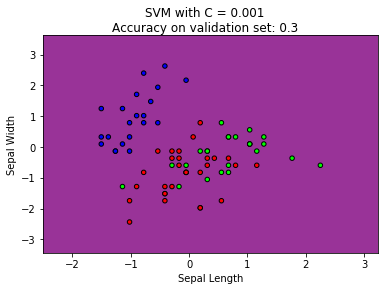

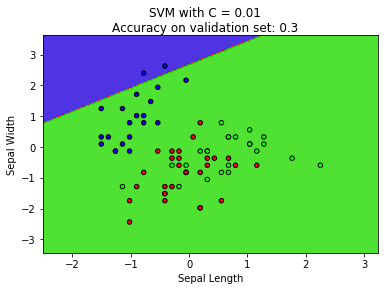

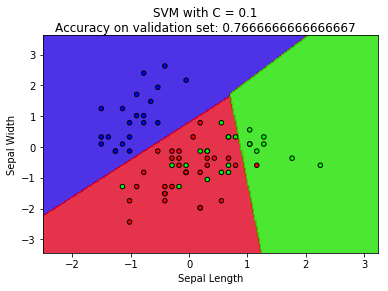

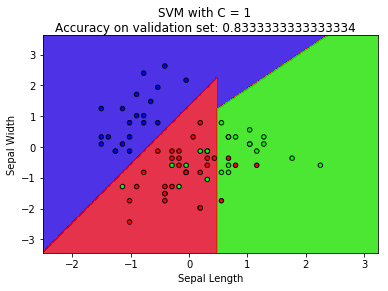

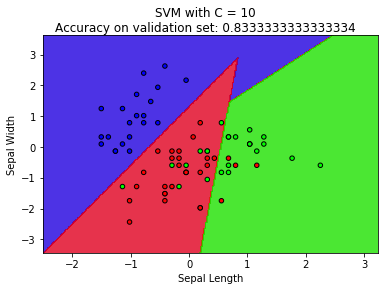

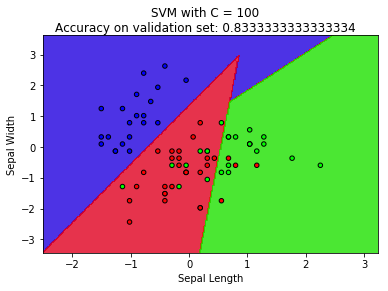

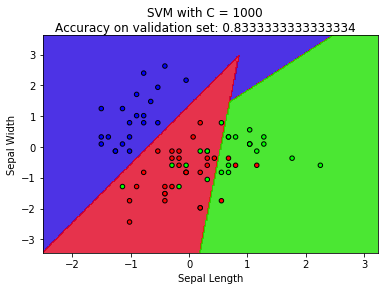

In [10]:
scores, clf = svm_with_kernel(X, y, X_train, y_train, X_validation, y_validation, 'linear', 'auto')

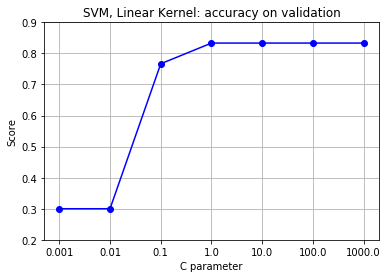

[(0.001, 0.3), (0.01, 0.3), (0.1, 0.7666666666666667), (1, 0.8333333333333334), (10, 0.8333333333333334), (100, 0.8333333333333334), (1000, 0.8333333333333334)]


In [22]:
plotSplineFunction(np.asarray(scores), 'Linear Kernel')
print(scores)

As we can see from the plot above, best values for C are <b>1</b>, <b>10</b>, <b>100</b> and <b>1000</b>, that provide an accuracy equal to <b>0.8333333333333334</b> on validation set.
Now that I have found the best C value for building a linear SVM model, I've to test it on the test set.

In [20]:
score = clf.score(X_test, y_test)

In [26]:
Markdown("Using <b>C = 1000</b> on test I've obtained a score equal to <b>{}</b>. This is a good result, because the accuracy is pretty high.".format(score))


Using <b>C = 1000</b> on test I've obtained a score equal to <b>0.8888888888888888</b>. This is a good result, because the accuracy is pretty high.

## 3 RBF Kernel
In this chapter I want to see the accuracy on test by using a non linear kernel. This time I have to estimate two hyperparameters: C and λ. As previously I have to split the original dataset into three groups (training, validation and testing) and test the model on the test after found the best parameters.

### 3.1 RBF with just the C value
The work is the same as in the previous chapter: finding best C value for this dataset.
So nothing with respect to before, but I've to set the kernel as <i>rbf</i> instead of <i>linear</i>

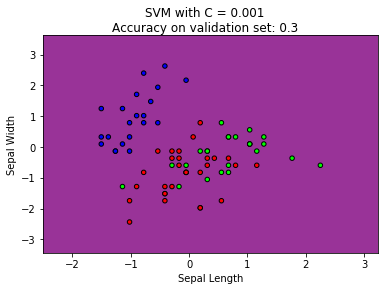

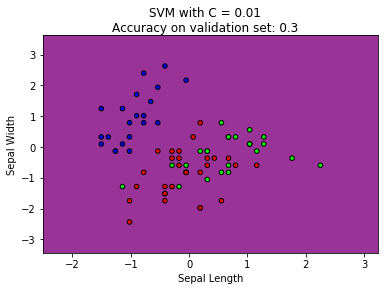

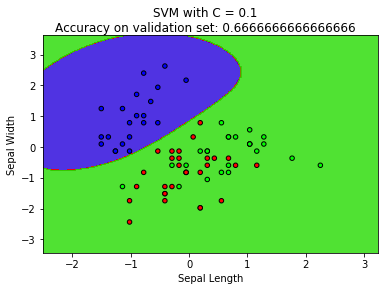

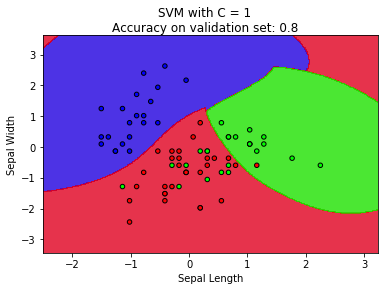

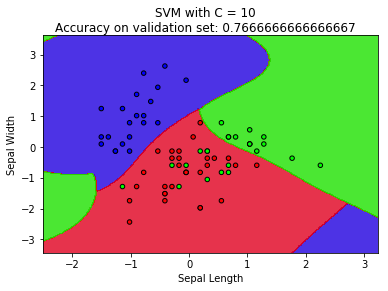

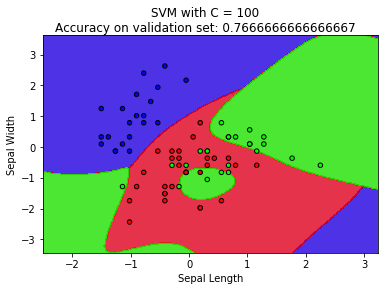

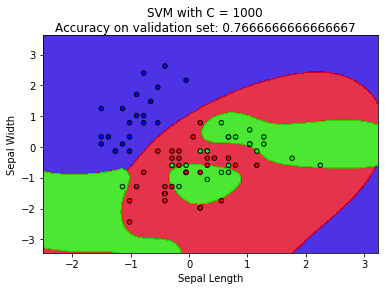

In [30]:
scores, clf = svm_with_kernel(X, y, X_train, y_train, X_validation, y_validation, 'rbf', 'auto')

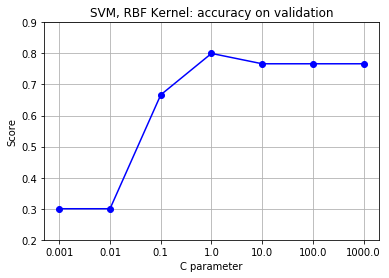

[(0.001, 0.3), (0.01, 0.3), (0.1, 0.6666666666666666), (1, 0.8), (10, 0.7666666666666667), (100, 0.7666666666666667), (1000, 0.7666666666666667)]


In [32]:
plotSplineFunction(np.asarray(scores), 'RBF Kernel')
print(scores)

This time the best C value is equal to <b>0.8</b>, a little bit less than the linear kernel seen before.

In [33]:
score = clf.score(X_test, y_test)

In [34]:
Markdown("The model accuracy on the test is equal to <b>{}</b>".format(score))

The model accuracy on the test is equal to <b>0.8222222222222222</b>

### 3.1 RBF with the C and λ values

To find the best combination of these two values I have to use a tecnique called grid search. 

In [41]:
def gridsearch_no_cv(X_train, y_train, X_validation, y_validation):
    best_score = 0
    best_clf = None
    best_gamma = 0
    best_C = 0
    gamma_vals = [1e-5, 1e-4, 1e-3, 2e-3, 1e-2, 2e-1, 1e-1]
    c_vals = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    scores = np.empty([len(gamma_vals) * len(c_vals), 3])
    index = 0
    for i, gamma in enumerate(gamma_vals):
        for j, C in enumerate(c_vals):
            model = SVC(C=C, kernel='rbf', gamma=gamma)
            clf = model.fit(X_train, y_train)
            score = clf.score(X_validation, y_validation)
            scores[index, 0:3] = gamma_vals[i], c_vals[j], score
            index += 1
            if(score > best_score):
                best_score = score
                best_clf = clf
                best_gamma = gamma
                best_C = C
    headers = ["Gamma", "C", "Accuracy on Validation"]
    table = tabulate(scores, headers, tablefmt="fancy_grid", numalign="right")
    print(table)
    print("Best Gamma: {}".format(best_gamma))
    print("Best C: {}".format(best_C))
    print("Best score on validation test: {}".format(best_score))
    return best_clf

In [42]:
clf = gridsearch_no_cv(X_train, y_train, X_validation, y_validation)

╒═════════╤═══════╤══════════════════════════╕
│   Gamma │     C │   Accuracy on Validation │
╞═════════╪═══════╪══════════════════════════╡
│   1e-05 │ 0.001 │                      0.3 │
├─────────┼───────┼──────────────────────────┤
│   1e-05 │  0.01 │                      0.3 │
├─────────┼───────┼──────────────────────────┤
│   1e-05 │   0.1 │                      0.3 │
├─────────┼───────┼──────────────────────────┤
│   1e-05 │     1 │                      0.3 │
├─────────┼───────┼──────────────────────────┤
│   1e-05 │    10 │                      0.3 │
├─────────┼───────┼──────────────────────────┤
│   1e-05 │   100 │                      0.3 │
├─────────┼───────┼──────────────────────────┤
│   1e-05 │  1000 │                 0.633333 │
├─────────┼───────┼──────────────────────────┤
│  0.0001 │ 0.001 │                      0.3 │
├─────────┼───────┼──────────────────────────┤
│  0.0001 │  0.01 │                      0.3 │
├─────────┼───────┼──────────────────────────┤
│  0.0001 │  

In [43]:
score = clf.score(X_test, y_test)

In [49]:
Markdown("Once found best parameters I have to use the related model on the test set. This returns accuracy equal to <b>{}</b>. Below there are the decision boundaries on the test set.".format(score))

Once found best parameters I have to use the related model on the test set. This returns accuracy equal to <b>0.8444444444444444</b>. Below there are the decision boundaries on the test set.

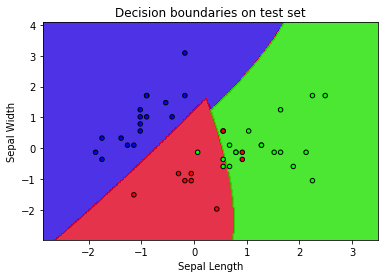

In [48]:
plot_boundaries(X_test, y_test, clf)

### 3.2 Grid search and K-fold
Finally, I have to find best hyperparameters after mergin validation and test sets and preforming a K-fold validation.

In [51]:
def gridsearch_cv(X_train, y_train):
    best_score = 0
    best_clf = None
    best_gamma = 0
    best_C = 0
    gamma_vals = [1e-5, 1e-4, 1e-3, 2e-3, 1e-2, 2e-1, 1e-1]
    c_vals = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    scores = np.empty([len(gamma_vals) * len(c_vals) * 5, 4])
    index = 0
    X_folds = np.array_split(X_train, 5)
    y_folds = np.array_split(y_train, 5)

    for i, gamma in enumerate(gamma_vals):
        for j, C in enumerate(c_vals):
            score = 0
            for k in range(5):
                X_train_cv = list(X_folds)
                X_validation_cv = X_train_cv.pop(k)
                X_train_cv = np.concatenate(X_train_cv)
                y_train_cv = list(y_folds)
                y_validation_cv = y_train_cv.pop(k)
                y_train_cv = np.concatenate(y_train_cv)
                model = SVC(C=C, kernel='rbf', gamma=gamma)
                clf = model.fit(X_train_cv, y_train_cv)
                score = clf.score(X_validation_cv, y_validation_cv)
                scores[index, 0:4] = gamma_vals[i], c_vals[j], int(k), score
                index += 1
                if(score > best_score):
                    best_score = score
                    best_clf = clf
                    best_gamma = gamma
                    best_C = C
    headers = ["Gamma", "C", "Fold No", "Accuracy on Validation Fold"]
    table = tabulate(scores, headers, tablefmt="fancy_grid", numalign="right")
    print(table)
    print("Best Gamma: {}".format(best_gamma))
    print("Best C: {}".format(best_C))
    print("Best score: {}".format(best_score))
    return best_clf

In [50]:
# Gridsearch with CV step
X_train = np.concatenate((X_train, X_validation), axis=0)
y_train = np.concatenate((y_train, y_validation), axis=0)

In [52]:
# At this point the dataset proportions are: Training 70% (105 elements) and Testing 30% (45 elements)
clf = gridsearch_cv(X_train, y_train)

╒═════════╤═══════╤═══════════╤═══════════════════════════════╕
│   Gamma │     C │   Fold No │   Accuracy on Validation Fold │
╞═════════╪═══════╪═══════════╪═══════════════════════════════╡
│   1e-05 │ 0.001 │         0 │                      0.571429 │
├─────────┼───────┼───────────┼───────────────────────────────┤
│   1e-05 │ 0.001 │         1 │                      0.380952 │
├─────────┼───────┼───────────┼───────────────────────────────┤
│   1e-05 │ 0.001 │         2 │                      0.333333 │
├─────────┼───────┼───────────┼───────────────────────────────┤
│   1e-05 │ 0.001 │         3 │                      0.333333 │
├─────────┼───────┼───────────┼───────────────────────────────┤
│   1e-05 │ 0.001 │         4 │                      0.380952 │
├─────────┼───────┼───────────┼───────────────────────────────┤
│   1e-05 │  0.01 │         0 │                      0.571429 │
├─────────┼───────┼───────────┼───────────────────────────────┤
│   1e-05 │  0.01 │         1 │         

In [53]:
score = clf.score(X_test, y_test)

In [55]:
Markdown("The accuracy on the test set is equal to <b>{}</b>.".format(score))

The accuracy on the test set is equal to <b>0.8666666666666667</b>.

This score is more high than the one, when we have used a fixed training and test sets. K-fold allow us to test the model on K different test sets. It ends up to find a best combination of parameters. This returns an higher accuracy.